# The Battle of Neighborhoods (Week 2)

### 1.  A description of the problem and a discussion of the background.
For this assignment, I have decided to review the city of Toronto and its neighborhood. My client is a store owner who deals in baseball accessories and would like to know which neighborhood in Toronto he should open a branch. His only requirement is that it must be close to any popular baseball field.

#### Problem: 
    The problem here is a simple one. We need to leverage the foursquare location data to solve the problem of determining a suitable location to set up shop for a baseball accessory store.
#### Audience:
    This kind of project is suitable for businesses looking to expand and would like to know which neigborhood to expand into. This project is important to any business personnel looking to expand as this can be easily redone to suit any industry. Stakeholders will be interested in this so as to adequately maximize profits by ensuring that the location chosen will yield enough traffic into the store.

### 2. Description of the data and how it will be used to solve the problem.
For this assignment, the data to be used will include:
#### Foursquare api for the neighborhoods
    This will be used to generate data relating to location,postal code, places and venues as learned in the course. A get request will then be used to get the top 10 most visited locations. The data will then be clustered to see which neighborhoods will be ideal to open a store at. 
##### How the data will be used
1. In each neighborhood, we will generate a request to the foursquare api to get the most common venues in that neighborhood. 
2. We will the get the top 10 most common venues
3. A clustering algorithm will then be used.
4. Our algorithm will group our neigborhood data according to top venues in the neighborhood. 
5. I will then select the neighborhood that meets the criteria of the stakeholder


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

print('Libraries imported.')

Libraries imported.


In [2]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' # Url given to import data
Wiki_data=pd.read_html(url,  na_values=['Not assigned'])  #This gives a nan to any 'Not assigned' value
Wiki_data #This gives all the tables in the webpage

[    Postal Code           Borough  \
 0           M1A               NaN   
 1           M2A               NaN   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 ..          ...               ...   
 175         M5Z               NaN   
 176         M6Z               NaN   
 177         M7Z               NaN   
 178         M8Z         Etobicoke   
 179         M9Z               NaN   
 
                                          Neighbourhood  
 0                                                  NaN  
 1                                                  NaN  
 2                                            Parkwoods  
 3                                     Victoria Village  
 4                            Regent Park, Harbourfront  
 ..                                                 ...  
 175                                                NaN  
 176                                                NaN  
 177                

In [3]:
T_data=Wiki_data[0] # Here we select the requiredtable

In [4]:
T_data.head()

,Postal Code,Borough,Neighbourhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
T_data.dropna(subset=['Borough'], inplace=True) # Here we remove any nan values in the Borough column
T_data.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
T_data.set_index('Postal Code', inplace=True) # The index is messed up, so we asssign it to a different column
T_data.rename(columns={"Neighbourhood":"Neighborhood"}, inplace= True)

In [7]:
T_data.sort_values(by='Postal Code',inplace=True)
#This can e used to sort the data so as to compare with the csv Geodata
T_data.head()

,Borough,Neighborhood
Postal Code,,
M1B,Scarborough,"Malvern, Rouge"
M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [8]:
T_data.reset_index(inplace=True) #We do this to reassign the correct index values

In [9]:
T_data.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [10]:
T_data.values

array([['M1B', 'Scarborough', 'Malvern, Rouge'],
       ['M1C', 'Scarborough', 'Rouge Hill, Port Union, Highland Creek'],
       ['M1E', 'Scarborough', 'Guildwood, Morningside, West Hill'],
       ['M1G', 'Scarborough', 'Woburn'],
       ['M1H', 'Scarborough', 'Cedarbrae'],
       ['M1J', 'Scarborough', 'Scarborough Village'],
       ['M1K', 'Scarborough',
        'Kennedy Park, Ionview, East Birchmount Park'],
       ['M1L', 'Scarborough', 'Golden Mile, Clairlea, Oakridge'],
       ['M1M', 'Scarborough',
        'Cliffside, Cliffcrest, Scarborough Village West'],
       ['M1N', 'Scarborough', 'Birch Cliff, Cliffside West'],
       ['M1P', 'Scarborough',
        'Dorset Park, Wexford Heights, Scarborough Town Centre'],
       ['M1R', 'Scarborough', 'Wexford, Maryvale'],
       ['M1S', 'Scarborough', 'Agincourt'],
       ['M1T', 'Scarborough', "Clarks Corners, Tam O'Shanter, Sullivan"],
       ['M1V', 'Scarborough',
        "Milliken, Agincourt North, Steeles East, L'Amoreaux East"],
  

In [11]:
missing_data = T_data.isnull()#We do this to check if there are any null values and the line of code below will check the values

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Postal Code
False    103
Name: Postal Code, dtype: int64

Borough
False    103
Name: Borough, dtype: int64

Neighborhood
False    103
Name: Neighborhood, dtype: int64



In [13]:
T_data

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [14]:
#required for subsequent parts

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.
Libraries imported.


In [15]:
url2='https://cocl.us/Geospatial_data'# Getting our required Data
Geocsvdata=pd.read_csv(url2)

In [16]:
Geocsvdata

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [17]:
Geodata=pd.merge(T_data,Geocsvdata,on='Postal Code') #Merging the tables

In [18]:
Geodata

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [19]:
#To get the lat and long of Toronto
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
Tlatitude = location.latitude
Tlongitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(Tlatitude, Tlongitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [20]:
#This creates a map of Toronto with the Borough superimposed on it
map_Toronto = folium.Map(location=[Tlatitude, Tlongitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Geodata['Latitude'], Geodata['Longitude'], Geodata['Borough'], Geodata['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [21]:
Tdata = Geodata.copy()#We make a copy to work with
type(Tdata)

pandas.core.frame.DataFrame

In [22]:
Geodata.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             93,  94,  95,  96,  97,  98,  99, 100, 101, 102],
           dtype='int64', length=103)

In [23]:
#Compare the two dataframes and you will see that some rows have been dropped
print(Geodata.shape)
print(Tdata.shape)

(103, 5)
(103, 5)


In [24]:
Tdata

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [25]:
CLIENT_ID = 'Q3ERFK5QORC25DTOID3RROR3W3FBSFTZEFE3BAEHNXVZOY2X' # your Foursquare ID
CLIENT_SECRET = '0RDGUTRLUCPKDBTHWXKI5OX2PD1MA0G32WWI3HFARB1FAFEL' # your Foursquare Secret
VERSION = '20201115' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q3ERFK5QORC25DTOID3RROR3W3FBSFTZEFE3BAEHNXVZOY2X
CLIENT_SECRET:0RDGUTRLUCPKDBTHWXKI5OX2PD1MA0G32WWI3HFARB1FAFEL


In [26]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
Tlatitude = location.latitude
Tlongitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(Tlatitude, Tlongitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API



radius = 500 # define radius


# create URL
urlT = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Tlatitude, 
    Tlongitude, 
    radius, 
    LIMIT)
urlT # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=Q3ERFK5QORC25DTOID3RROR3W3FBSFTZEFE3BAEHNXVZOY2X&client_secret=0RDGUTRLUCPKDBTHWXKI5OX2PD1MA0G32WWI3HFARB1FAFEL&v=20201115&ll=43.6534817,-79.3839347&radius=500&limit=100'

In [28]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [29]:

results = requests.get(urlT).json()["response"]['groups'][0]['items']

In [30]:
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5227bb01498e17bf485e6202',
   'name': 'Downtown Toronto',
   'location': {'lat': 43.65323167517444,
    'lng': -79.38529600606677,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.65323167517444,
      'lng': -79.38529600606677}],
    'distance': 113,
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['Toronto ON', 'Canada']},
   'categories': [{'id': '4f2a25ac4b909258e854f55f',
     'name': 'Neighborhood',
     'pluralName': 'Neighborhoods',
     'shortName': 'Neighborhood',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-5227bb01498e17bf485e6202-0'},
 {'reasons': {'count': 0,
   'items': [{'summar

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
Tdata_venues = getNearbyVenues(names=Tdata['Neighborhood'],
                                   latitudes=Tdata['Latitude'],
                                   longitudes=Tdata['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [34]:
print(Tdata_venues.shape)
Tdata_venues.head()

(2167, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,SEBS Engineering Inc. (Sustainable Energy and ...,43.782371,-79.156820,Construction & Landscaping
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [35]:
Tdata_venues.groupby('Neighborhood').mean()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude
Neighborhood,,,,
Agincourt,43.794200,-79.262029,43.792613,-79.261140
"Alderwood, Long Branch",43.602414,-79.543484,43.601445,-79.545006
"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,43.755581,-79.440249
Bayview Village,43.786947,-79.385975,43.787903,-79.380860
"Bedford Park, Lawrence Manor East",43.733282,-79.419750,43.733578,-79.419342
...,...,...,...,...
"Willowdale, Willowdale West",43.782736,-79.442259,43.783510,-79.445782
Woburn,43.770992,-79.216917,43.770119,-79.219634
Woodbine Heights,43.695344,-79.318389,43.696755,-79.315547


In [36]:
print('There are {} uniques categories.'.format(len(Tdata_venues['Venue Category'].unique())))

There are 277 uniques categories.


In [37]:
# one hot encoding
Tdata_onehot = pd.get_dummies(Tdata_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tdata_onehot['Neighborhood'] = Tdata_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tdata_onehot.columns[-1]] + list(Tdata_onehot.columns[:-1])
Tdata_onehot = Tdata_onehot[fixed_columns]

Tdata_onehot.shape#.values#.head()

(2167, 277)

In [38]:
Tdata_onehot

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
Tdata_grouped = Tdata_onehot.groupby('Neighborhood').mean().reset_index()
Tdata_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
Tdata_grouped.shape

(96, 277)

In [41]:
num_top_venues = 5

for hood in Tdata_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Tdata_grouped[Tdata_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    


----Agincourt----
                       venue  freq
0                     Lounge   0.2
1             Breakfast Spot   0.2
2               Skating Rink   0.2
3  Latin American Restaurant   0.2
4             Clothing Store   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.29
1             Gym  0.14
2  Sandwich Place  0.14
3             Pub  0.14
4     Coffee Shop  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0.10
1                       Bank  0.10
2                   Pharmacy  0.05
3              Shopping Mall  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Café  0.25
2   Chinese Restaurant  0.25
3                 Bank  0.25
4        Movie Theater  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.09
1  Italian Restaurant  0.09

In [42]:
Tdata_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## TEST: This is done to see if there is a relationship between the number of top venues, the number of clusters and the accuracy 
ntv = range(1,0)
for vtn in ntv:
    
    num_top_venues = vtn

    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = Tdata_grouped['Neighborhood']

    for ind in np.arange(Tdata_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tdata_grouped.iloc[ind, :], num_top_venues)
    
    
    Mldata=neighborhoods_venues_sorted.copy
    cluster_dataset = StandardScaler(Mldata)
    
    nofc=15
    krange = range(2,nofc)
    Kscored=np.zeros(nofc)
    Tdata_grouped_clustering = Tdata_grouped.drop('Neighborhood', 1)

    # run k-means clustering
    for n in krange:
    
        kmeans = KMeans(init = "k-means++",n_clusters=n,n_init = 12).fit(Tdata_grouped_clustering)
        Kscored[n]=sklearn.metrics.silhouette_score(Tdata_grouped_clustering,kmeans.labels_,metric='euclidean')
        Kscore=Kscored[2:15]
    plt.figure(vtn) # add this statement before your plot
    plt.plot(krange,Kscore);
    plt.show()
    

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Tdata_grouped['Neighborhood']

for ind in np.arange(Tdata_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tdata_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Donut Shop,Discount Store,Distribution Center,Dive Bar,Dog Run
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Coffee Shop,Sandwich Place,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Chinese Restaurant,Bridal Shop,Sandwich Place,Diner,Restaurant,Deli / Bodega,Middle Eastern Restaurant,Supermarket
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Diner,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Greek Restaurant,Sushi Restaurant,Pharmacy,Pizza Place,Pub,Café,Restaurant


In [45]:
neighborhoods_venues_sorted.shape

(96, 11)


Initializing Kmeans

In [46]:
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import metrics
from sklearn.metrics import silhouette_score


In [47]:
# set number of clusters
nofc=15
krange = range(2,nofc)
Kscored=np.zeros(nofc)
Tdata_grouped_clustering = Tdata_grouped.drop('Neighborhood', 1)

# run k-means clustering
for n in krange:
    
    kmeanstest = KMeans(init = "k-means++",n_clusters=n,n_init = 12).fit(Tdata_grouped_clustering)
    Kscored[n]=sklearn.metrics.silhouette_score(Tdata_grouped_clustering,kmeanstest.labels_,metric='euclidean')
    Kscore=Kscored[2:15]
    

# check cluster labels generated for each row in the dataframe
print(kmeanstest.labels_)
print(Kscore)


[11  0  7 11  7  7 11 11 11 11  3  7 11  7 11  7  0  6  7  0 11  0 11 11
 11 11  4  7 11  7 11 11 12 12 11  7 11 11  0  1 11 11  7 11  0 11 12 11
 11  8 12 11 11  7 12 11 13  7  1 11  7  3  7  7  7  3 11 10  7 11 11  0
 11 11  0  7 11  7  0 11  7  9  0  7 11  7  5  0  3 11 11  0  7 11  4  2]
[0.27790127 0.29185378 0.28626424 0.30328067 0.30552047 0.16593598
 0.20830951 0.08855215 0.15432891 0.12376561 0.11466588 0.23773303
 0.0100982 ]


In [48]:
kmeanstest.cluster_centers_

array([[ 3.47222222e-03, -4.33680869e-19,  0.00000000e+00, ...,
        -2.16840434e-19,  0.00000000e+00, -8.67361738e-19],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.34333694e-03,  6.08974359e-03,  0.00000000e+00, ...,
         2.10110942e-03,  1.56250000e-03,  2.97941495e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

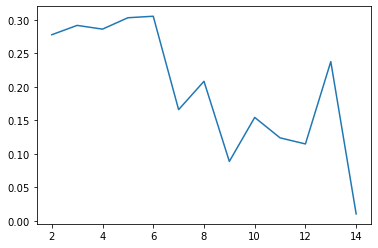

In [49]:
import matplotlib.pyplot as plt
plt.plot(krange,Kscore);

In [50]:
kclusters=6
kmeans = KMeans(init = "k-means++",n_clusters=kclusters,n_init = 12).fit(Tdata_grouped_clustering)
kmeans_score=sklearn.metrics.silhouette_score(Tdata_grouped_clustering,kmeans.labels_,metric='euclidean')


In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Tdata_merged = Tdata

# merge to add latitude/longitude for each neighborhood
Tdata_merged = Tdata_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Tdata_merged.dropna(inplace=True) # check the last columns!


In [52]:
cluster_label=Tdata_merged['Cluster Labels'].astype(int)
print(Tdata_merged.dtypes)
print(cluster_label)

Postal Code                object
Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object
0      2
1      3
2      3
3      3
4      3
      ..
98     4
99     3
100    0
101    3
102    3
Name: Cluster Labels, Length: 100, dtype: int64


In [53]:
# create map
map_clusters = folium.Map(location=[Tlatitude, Tlongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tdata_merged['Latitude'], Tdata_merged['Longitude'], Tdata_merged['Neighborhood'], cluster_label):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-5],
        fill=True,
        fill_color=rainbow[cluster-5],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [54]:
type(cluster)

int

In [55]:
Tdata_merged.loc[Tdata_merged['Cluster Labels'] == 0, Tdata_merged.columns[[1] + list(range(5, Tdata_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Scarborough,0.0,Bus Line,Bakery,Soccer Field,Ice Cream Shop,Bus Station,Metro Station,Intersection,Park,German Restaurant,General Travel
14,Scarborough,0.0,Park,Playground,Bakery,Intersection,Women's Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dive Bar
44,Central Toronto,0.0,Park,Swim School,Bus Line,Women's Store,Doner Restaurant,Discount Store,Distribution Center,Dive Bar,Dog Run,Donut Shop
50,Downtown Toronto,0.0,Park,Playground,Tennis Court,Trail,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Department Store
64,Central Toronto,0.0,Trail,Jewelry Store,Mexican Restaurant,Sushi Restaurant,Park,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
72,North York,0.0,Park,Pizza Place,Bakery,Japanese Restaurant,Pub,Dog Run,Diner,Discount Store,Distribution Center,Dive Bar
79,North York,0.0,Park,Bakery,Construction & Landscaping,Women's Store,Drugstore,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
96,North York,0.0,Pizza Place,Furniture / Home Store,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop,Doner Restaurant
100,Etobicoke,0.0,Pizza Place,Park,Bus Line,Sandwich Place,Dog Run,Diner,Discount Store,Distribution Center,Dive Bar,Doner Restaurant


In [56]:
Tdata_merged.loc[Tdata_merged['Cluster Labels'] == 1, Tdata_merged.columns[[1] + list(range(5, Tdata_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Etobicoke,1.0,Print Shop,Donut Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Women's Store,Dessert Shop


In [57]:
Tdata_merged.loc[Tdata_merged['Cluster Labels'] == 2, Tdata_merged.columns[[1] + list(range(5, Tdata_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,2.0,Fast Food Restaurant,Donut Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Farmers Market


In [58]:
Tdata_merged.loc[Tdata_merged['Cluster Labels'] == 3, Tdata_merged.columns[[1] + list(range(5, Tdata_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,3.0,Construction & Landscaping,Bar,Women's Store,Drugstore,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
2,Scarborough,3.0,Mexican Restaurant,Electronics Store,Restaurant,Breakfast Spot,Rental Car Location,Medical Center,Intersection,Bank,Women's Store,Discount Store
3,Scarborough,3.0,Coffee Shop,Mexican Restaurant,Korean BBQ Restaurant,Women's Store,Donut Shop,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant
4,Scarborough,3.0,Hakka Restaurant,Athletics & Sports,Bakery,Gas Station,Caribbean Restaurant,Thai Restaurant,Bank,Fried Chicken Joint,Dive Bar,Distribution Center
5,Scarborough,3.0,Playground,Smoke Shop,Jewelry Store,Women's Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run
...,...,...,...,...,...,...,...,...,...,...,...,...
92,Etobicoke,3.0,Hardware Store,Tanning Salon,Wings Joint,Kids Store,Fast Food Restaurant,Discount Store,Convenience Store,Gym,Burrito Place,Burger Joint
95,Etobicoke,3.0,Pharmacy,Beer Store,Pizza Place,Coffee Shop,Convenience Store,Café,Shopping Plaza,Liquor Store,Gift Shop,German Restaurant
99,Etobicoke,3.0,Pizza Place,Discount Store,Sandwich Place,Coffee Shop,Chinese Restaurant,Intersection,Dive Bar,Dim Sum Restaurant,Diner,Distribution Center
101,Etobicoke,3.0,Pizza Place,Grocery Store,Pharmacy,Fast Food Restaurant,Sandwich Place,Beer Store,Fried Chicken Joint,Liquor Store,Eastern European Restaurant,Electronics Store


In [59]:
Tdata_merged.loc[Tdata_merged['Cluster Labels'] == 4, Tdata_merged.columns[[1] + list(range(5, Tdata_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,North York,4.0,Park,Convenience Store,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant
25,North York,4.0,Food & Drink Shop,Park,Donut Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Women's Store
40,East York,4.0,Park,Convenience Store,Intersection,Women's Store,Donut Shop,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant
74,York,4.0,Park,Women's Store,Pool,Donut Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant
98,York,4.0,Park,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Drugstore


In [60]:
Tdata_merged.loc[Tdata_merged['Cluster Labels'] == 5, Tdata_merged.columns[[1] + list(range(5, Tdata_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,Etobicoke,5.0,Baseball Field,Construction & Landscaping,Women's Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
97,North York,5.0,Baseball Field,Women's Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Diner
